## 3. Robintrack - some analysis on users/tickers 
    

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv

#import numpy as np
#from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### The objective is to read al the CVS files for all tickers and select (2020 - August) those above a certain number of users 
#### min_users = 0 will select all tickers  



In [45]:
# This function read the csvfile into a datframe and gets the number of users for tickers with number of users bigger than a given target (min_users)

def read_data(raw_csv, min_users):
    
    # Read in csv 
    try:
        df_new_csv = pd.read_csv (raw_csv)  

    except Exception as err:
        print(f'Other error occurred: {err}')  
        return
    else:
        print('.', end = '')

    if df_new_csv.iloc[-1,-1] > min_users:
        print (f'\nticker: {raw_csv}, number of users = {df_new_csv.iloc[-1,-1]}') 
        return df_new_csv.iloc[-1,-1]


In [46]:
# function to get ticker's name from the string 
def string_cleaning(string):
    for index, letter in enumerate(string): 
        if letter == '/': ind = int(index)

    return string[ind+1:]

### This main scrip sets the target of users and select all csv in all folders to be analyzed

In [47]:
# Citation: https://pandasninja.com/2019/04/how-to-read-lots-of-csv-files-easily-into-pandas/


# Create and empty DataFrame for most popular tickers 
df_popularity = pd.DataFrame()
min_users = 300000
total_num_csv = 0

raw_folders = os.listdir('../data/rawdata_robin_all')
for folder in raw_folders:
    raw_csvs = os.listdir(f'../data/rawdata_robin_all/{folder}')
    for raw_csv in raw_csvs:
        raw_csv = f'../data/rawdata_robin_all/{folder}/{raw_csv}'
        number_users = read_data(raw_csv, min_users)
        total_num_csv += 1
        if number_users:
            ticker_symbol = string_cleaning(raw_csv)
            df_popularity = df_popularity.append({'ticker' : ticker_symbol, 'users' : number_users}, ignore_index = True) 

print ('\n\nend of dir loop')
print (f'\n total number of csv files (tickers) = {total_num_csv}')

..........................................
ticker: ../data/rawdata_robin_all/popularity_export/UAL.csv, number of users = 311457
...............................................................................................................................................
ticker: ../data/rawdata_robin_all/popularity_export/BA.csv, number of users = 320552
..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [48]:
df_popularity.describe()

,users
count,20.000000
mean,504294.800000
std,181110.743866
min,311457.000000
25%,352372.750000
50%,452677.000000
75%,608201.500000
max,911470.000000


In [41]:
df_popularity.sort_values('users', axis=0, ascending=True, inplace=False)

,ticker,users
0,UAL.csv,311457.0
1,BA.csv,320552.0
13,FIT.csv,323346.0
11,MRNA.csv,339461.0
4,SNAP.csv,350278.0
18,NCLH.csv,353071.0
2,BAC.csv,359999.0
16,PLUG.csv,387421.0
5,AMZN.csv,427973.0
8,ACB.csv,430303.0


In [49]:
users_low_end = 500000
users_high_end = 1000000

df_popularity_select = df_popularity[(df_popularity["users"] > users_low_end) & (df_popularity["users"] < users_high_end)]
df_popularity_select.sort_values('users', axis=0, ascending=True, inplace=False)

,ticker,users
12,TSLA.csv,563621.0
17,DAL.csv,572679.0
9,DIS.csv,598367.0
15,AAL.csv,637705.0
6,MSFT.csv,653838.0
19,AAPL.csv,730774.0
10,GE.csv,856899.0
3,F.csv,911470.0


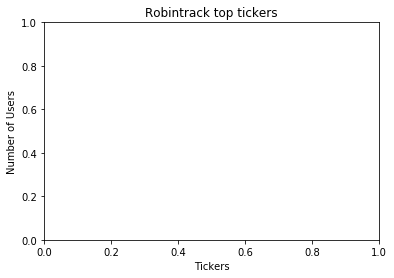

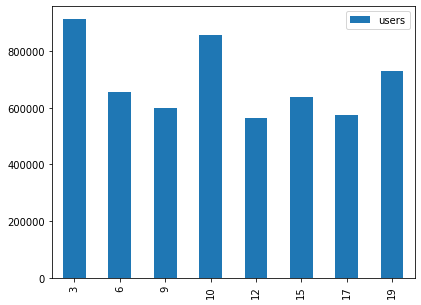

In [43]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

plt.xlabel('Tickers')
plt.ylabel('Number of Users')
plt.title(f'Robintrack top tickers')
#plt.xlim(2010, 2016)
#plt.ylim((housing_units.min()-housing_units.std()), (housing_units.max()+housing_units.std()))
#housing_units.plot.bar(figsize=(6.5, 5)).get_figure().savefig('./Images/housing_units_bar') # --> save plot into a file as well
df_popularity_select[['users', 'ticker']].plot.bar(figsize=(6.5, 5))

In [44]:
# export top ticks  to csv
df_popularity_select.to_csv(r'../data/cleandata/Processed_Data/df_popularity.csv', index = False)